# Import Libraries:

In [1]:
#cleaning data and EDA 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer

#splitting data into training and testing sets
from sklearn.model_selection import train_test_split, GridSearchCV

#normalizing data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#dummifying data
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#models that we will use
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#evaluating results
from sklearn.metrics import r2_score

#save models
import joblib

In [2]:
original_copy = pd.read_csv('./data/insurance.csv')
data = original_copy.copy()
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [3]:
data.isna().sum()

age         0
sex         0
bmi         5
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(data['bmi'].values.reshape(-1, 1))
data['bmi'] = imputer.transform(data['bmi'].values.reshape(-1, 1))

data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# EDA:

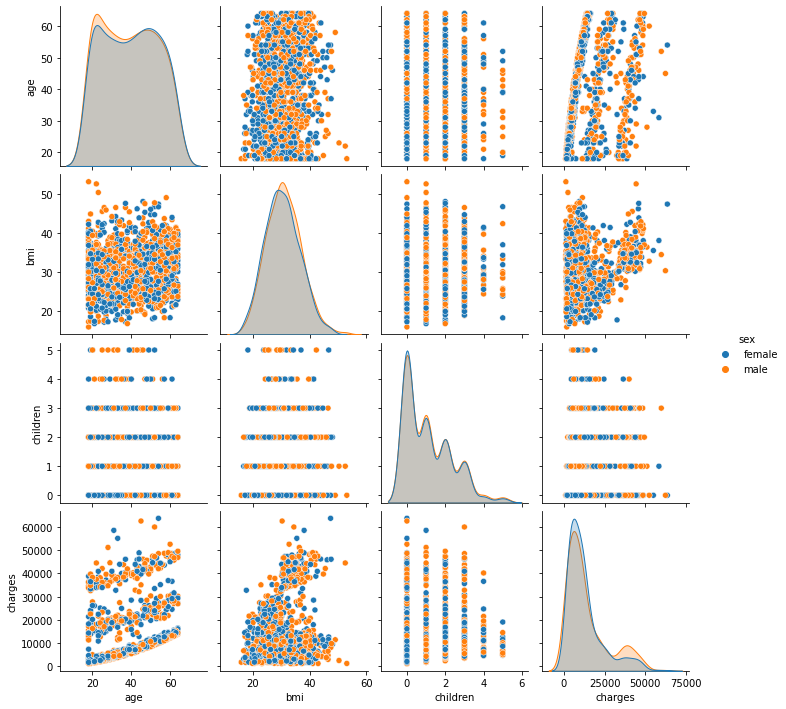

In [5]:
sns.pairplot(data, hue='sex')

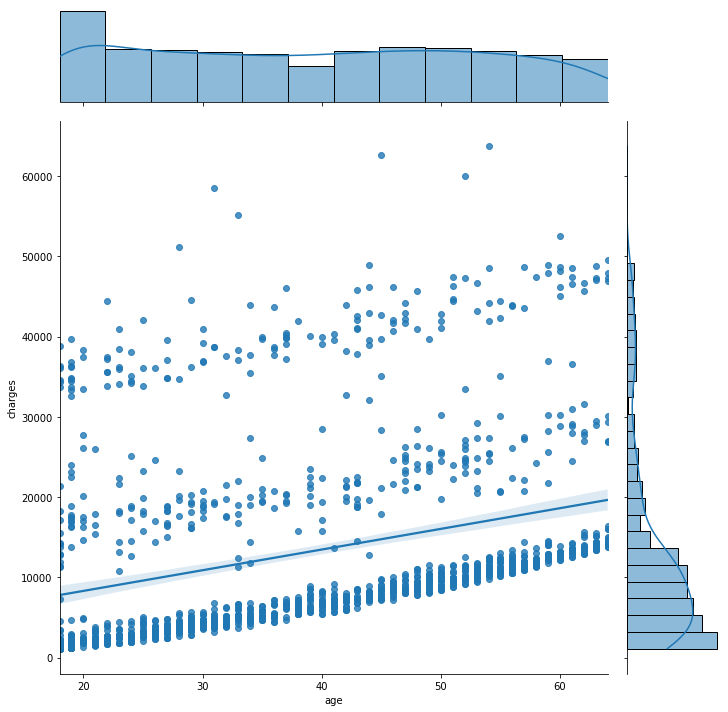

In [6]:
sns.jointplot(x='age', y='charges', data=data, kind='reg', height=10)

E:\my_env\ds_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\my_env\ds_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\my_env\ds_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histogra

<AxesSubplot:xlabel='charges', ylabel='Density'>

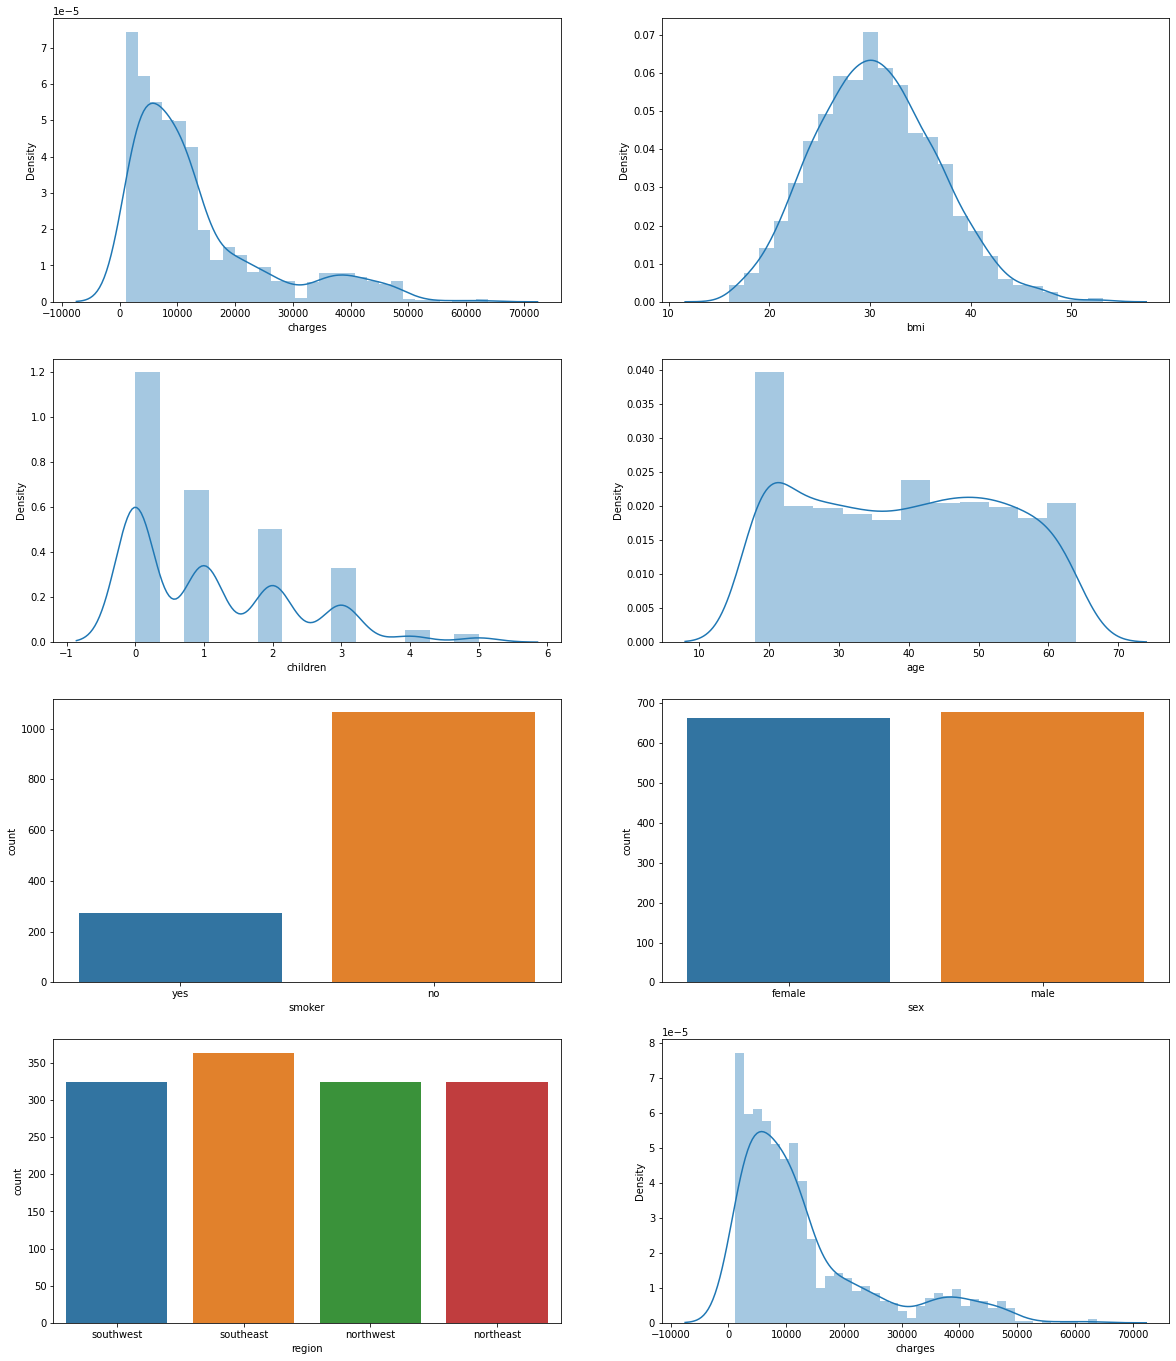

In [7]:
figure, ax = plt.subplots(4,2, figsize=(20,24))

sns.distplot(data['charges'], ax=ax[0,0])
sns.distplot(data.bmi, ax=ax[0,1])
sns.distplot(data.children, ax=ax[1,0])
sns.distplot(data.age, ax=ax[1,1])

sns.countplot(data.smoker, ax=ax[2,0])
sns.countplot(data.sex, ax=ax[2,1])
sns.countplot(data.region, ax=ax[3,0])
sns.distplot(data.charges, bins=40, ax=ax[3,1])

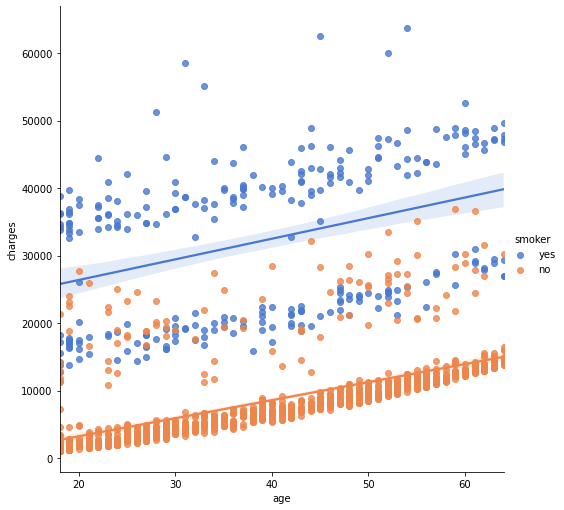

In [8]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'muted', height= 7)

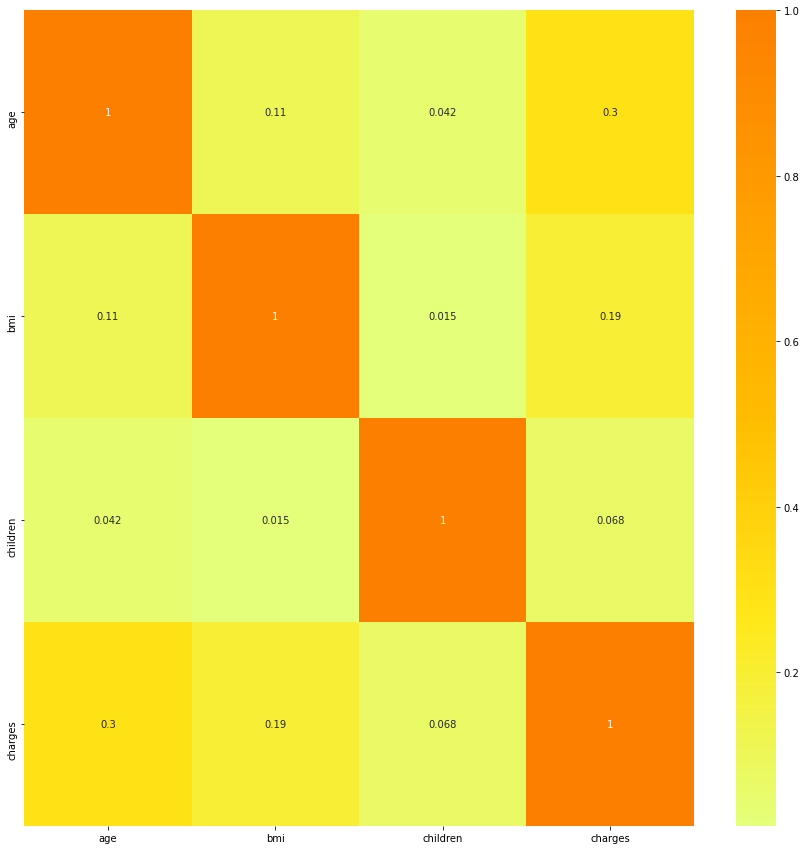

In [9]:
corr = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap='Wistia', annot=True)
plt.show()

In [10]:
px.bar(data, 'region', 'charges', title='Interactive bar plot')

## Dummfying cartegorical variables:

## Sex

In [11]:
sex = data.iloc[:,1:2].values

le = LabelEncoder()

sex = le.fit_transform(sex[:,0])
sex = pd.DataFrame(sex, columns=['sex'])
le_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print(le.classes_)

['female' 'male']


## Smoker

In [12]:
smoker = data.iloc[:,4]

smoker = le.fit_transform(smoker)
smoker = pd.DataFrame(smoker, columns=['smoker'])

smoker.head()

smoker
0       1
1       0
2       0
3       0
4       0

In [13]:
smoker = data["smoker"] # series 
s_encoded, s_categories = pd.factorize(smoker)
factor_s_mapping = dict(zip(s_categories, s_encoded))
factor_s_mapping
smoker = smoker.map(factor_s_mapping)
factor_s_mapping

{'yes': 0, 'no': 1}

## Region

In [14]:
ohe = OneHotEncoder()

region = data.iloc[:,5:6].values
region = ohe.fit_transform(region).toarray()

In [15]:
cols = []
for i in data.region.unique():
    cols.insert(0,i)

region = pd.DataFrame(region, columns=cols)
region

northeast  northwest  southeast  southwest
0           0.0        0.0        0.0        1.0
1           0.0        0.0        1.0        0.0
2           0.0        0.0        1.0        0.0
3           0.0        1.0        0.0        0.0
4           0.0        1.0        0.0        0.0
...         ...        ...        ...        ...
1333        0.0        1.0        0.0        0.0
1334        1.0        0.0        0.0        0.0
1335        0.0        0.0        1.0        0.0
1336        0.0        0.0        0.0        1.0
1337        0.0        1.0        0.0        0.0

[1338 rows x 4 columns]

## Splitting data

In [16]:
X_num = data[['age', 'bmi', 'children']].copy()

features = pd.concat([X_num, region, sex, smoker], axis = 1)
labels = data[['charges']].copy()

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.33, random_state = 0 )

In [17]:
cleaned_data = pd.concat([features, labels], axis=1)
#backup copy
# cleaned_data.to_csv('./data/cleaned_insurance.csv')
cleaned_data.head()

age     bmi  children  northeast  northwest  southeast  southwest  sex  \
0   19  27.900         0        0.0        0.0        0.0        1.0    0   
1   18  33.770         1        0.0        0.0        1.0        0.0    1   
2   28  33.000         3        0.0        0.0        1.0        0.0    1   
3   33  22.705         0        0.0        1.0        0.0        0.0    1   
4   32  28.880         0        0.0        1.0        0.0        0.0    1   

   smoker      charges  
0       0  16884.92400  
1       1   1725.55230  
2       1   4449.46200  
3       1  21984.47061  
4       1   3866.85520

## Exporting files:

In [18]:
# X_train.to_csv('./data/split_X_train.csv', index = False)
# X_test.to_csv('./data/split_X_test.csv', index = False)
# y_train.to_csv('./data/split_y_train.csv', index = False)
# y_test.to_csv('./data/split_y_test.csv', index = False)

## Feature scaling

In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test = sc.transform(X_test.astype(np.float))

# Making Predictions:

## Base Algo:

In [20]:
def make_pred(model, name, xtrain, ytrain, xtest, ytest):
    mdl = model.fit(xtrain,ytrain.values.ravel())
    y_train_pred = model.predict(xtrain)
    y_test_pred = model.predict(xtest)
        
    try:
        print(f'{model}.coef_: {model.coef_}')
        print(f'{model}.intercept_: {model.intercept_}')
    except AttributeError:
        print(f'{model} has not coef_ or intercept_')

    print(' %s train score %.3f, %s test score: %.3f' % (name, model.score(xtrain, ytrain), name, model.score(xtest, ytest)))

# Models:

## LinearRegression:

In [21]:
lr = LinearRegression()

make_pred(lr, 'LR', X_train, y_train, X_test, y_test)

LinearRegression().coef_: [ 3624.36356197  1966.90473927   661.35603447   242.57758422
   -29.49212715  -104.19142495   -99.14488063   -44.54996175
 -9310.54961689]
LinearRegression().intercept_: 13141.350831640624
 LR train score 0.728, LR test score: 0.786


## SupportVectorRegressor:

In [22]:
svr = SVR(kernel='linear', C = 300)

make_pred(svr,'SVR', X_train, y_train, X_test, y_test)

SVR(C=300, kernel='linear').coef_: [[ 3652.88084977   202.46754224   475.97904631   179.67244105
     32.53987879  -126.02330398   -76.96879816  -184.83769075
  -6571.51888242]]
SVR(C=300, kernel='linear').intercept_: [10370.82641928]
 SVR train score 0.598, SVR test score: 0.628


## DecisionTree:

In [23]:
dt = DecisionTreeRegressor(random_state=0)

make_pred(dt, 'DT', X_train, y_train, X_test, y_test)

DecisionTreeRegressor(random_state=0) has not coef_ or intercept_
 DT train score 0.999, DT test score: 0.706


## RandomForest:

In [24]:
forest = RandomForestRegressor(n_estimators = 100, criterion = 'mse', random_state = 1, n_jobs = -1)

make_pred(forest, "RF", X_train, y_train, X_test, y_test)

RandomForestRegressor(n_jobs=-1, random_state=1) has not coef_ or intercept_
 RF train score 0.973, RF test score: 0.860


## PolyNomialRegression:

In [25]:
#preparing for PolyNomial model:
poly = PolynomialFeatures (degree = 3)

X_poly = poly.fit_transform(features) #feautures (X_train + y_train)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, labels, test_size = 0.33, random_state = 0)

#standardize after the new split:
sc = StandardScaler()
X_train_poly = sc.fit_transform(X_train_poly.astype(np.float))
X_test_poly = sc.transform(X_test_poly.astype(np.float))

#PolyNomial LR model:
poly_lr = LinearRegression().fit(X_train_poly, y_train_poly)

make_pred(poly_lr, 'PolyLR', X_train_poly, y_train_poly, X_test_poly, y_test_poly)

LinearRegression().coef_: [ 1.12972993e-11  1.85641383e+16 -1.48642234e+16  1.97016627e+16
 -5.12296309e+15 -5.37644849e+15 -3.57080268e+15  2.59222606e+16
  5.24600197e+16  1.26616401e+16 -5.35130776e+15 -2.07369741e+16
  1.10452658e+16 -2.38592437e+15 -2.66411429e+16 -2.57544319e+16
 -3.31905799e+16  4.45120956e+16 -2.44396287e+16 -1.50253870e+16
 -4.26356291e+16  3.83043816e+16  1.88084260e+16  4.76771878e+16
  2.35733900e+15  4.10703563e+15  1.06182432e+16 -4.53888998e+16
 -2.47702056e+16 -2.78463493e+16 -6.33714970e+16 -7.46611583e+16
  1.45734658e+16  9.89745072e+15  5.08215452e+15  8.39990079e+15
 -1.39425629e+16 -6.24891773e+15 -2.17767524e+16 -8.89944289e+15
  2.26045509e+15  9.26109428e+15 -1.12923925e+15 -1.06753782e+16
  1.73926155e+16  9.40398283e+14  2.22948657e+15 -2.97531954e+16
  1.96722556e+15 -1.54219487e+16 -1.75073739e+16 -6.62890716e+15
  4.10510273e+15  1.68330615e+16 -9.25241337e+15  1.10260000e+04
 -3.05400000e+03  7.54800000e+03  4.43396092e+15  4.53797803e+15

## Using GridSearchCV:
#### Tweaking HyperParmaters for electing the best performing model

## Base

In [26]:
def best_params(model, name):
    param_dict = model.best_estimator_.get_params()
    model_str = str(model.estimator).split('(')[0]
    print("\n*** {} Best Parameters ***".format(model_str))
    for k in param_dict:
        print("{}: {}".format(k, param_dict[k]))

    print('\n %s train score %.3f, %s test score: %.3f' % (model_str, model.score(X_train,y_train), model_str, model.score(X_test, y_test)))

    joblib.dump(model.best_estimator_, f'./data/{name}.pkl')


## SupportVectorRegressor models:

In [27]:
svr = SVR()

parameters = dict(kernel=[ 'linear', 'poly'],
                     degree=[2],
                     C=[600, 700, 800, 900],
                     epsilon=[0.0001, 0.00001, 0.000001]
)

model_svr = GridSearchCV(svr, parameters, cv=5, verbose=3)
model_svr = model_svr.fit(X_train,y_train.values.ravel())

best_params(model_svr, "model_SVR")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=600, degree=2, epsilon=0.0001, kernel=linear;, score=0.671 total time=   0.0s
[CV 2/5] END C=600, degree=2, epsilon=0.0001, kernel=linear;, score=0.663 total time=   0.0s
[CV 3/5] END C=600, degree=2, epsilon=0.0001, kernel=linear;, score=0.571 total time=   0.0s
[CV 4/5] END C=600, degree=2, epsilon=0.0001, kernel=linear;, score=0.636 total time=   0.0s
[CV 5/5] END C=600, degree=2, epsilon=0.0001, kernel=linear;, score=0.555 total time=   0.0s
[CV 1/5] END C=600, degree=2, epsilon=0.0001, kernel=poly;, score=0.485 total time=   0.0s
[CV 2/5] END C=600, degree=2, epsilon=0.0001, kernel=poly;, score=0.336 total time=   0.0s
[CV 3/5] END C=600, degree=2, epsilon=0.0001, kernel=poly;, score=0.278 total time=   0.0s
[CV 4/5] END C=600, degree=2, epsilon=0.0001, kernel=poly;, score=0.372 total time=   0.0s
[CV 5/5] END C=600, degree=2, epsilon=0.0001, kernel=poly;, score=0.222 total time=   0.0s
[CV 1/5] END C=600

## DecisionTree models:

In [28]:
dt = DecisionTreeRegressor(random_state=0)

parameters = dict(min_samples_leaf=np.arange(9, 13, 1, int), 
                  max_depth = np.arange(4,7,1, int),
                  min_impurity_decrease = [0, 1, 2],
)

model_dt = GridSearchCV(dt, parameters, cv=5, verbose=3)
model_dt = model_dt.fit(X_train,y_train.values.ravel())

best_params(model_dt, 'model_DT')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=9;, score=0.817 total time=   0.0s
[CV 2/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=9;, score=0.819 total time=   0.0s
[CV 3/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=9;, score=0.846 total time=   0.0s
[CV 4/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=9;, score=0.812 total time=   0.0s
[CV 5/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=9;, score=0.796 total time=   0.0s
[CV 1/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=10;, score=0.818 total time=   0.0s
[CV 2/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=10;, score=0.819 total time=   0.0s
[CV 3/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=10;, score=0.846 total time=   0.0s
[CV 4/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=10;, score=0.815 total time=   0.0s
[CV 5/5

## RandomForest models:

In [29]:
rf = RandomForestRegressor(random_state=0)

parameters = dict(n_estimators=[20],
                     max_depth=np.arange(1, 13, 2),
                     min_samples_split=[2],
                     min_samples_leaf= np.arange(1, 15, 2, int),
                     bootstrap=[True, False],
                     oob_score=[False, ]
)


model_rf = GridSearchCV(rf, parameters, cv=5, verbose=3)
model_rf = model_rf.fit(X_train,y_train.values.ravel())

best_params(model_rf, 'model_RF')

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.616 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.454 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.646 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.595 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.582 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.616 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, mi